## NOAA Tornado History Data
### Data from [NOAA](https://www.ncei.noaa.gov/access/monitoring/tornadoes/):
Tornado statistics for the Contiguous U.S. are provided by the [Storm Prediction Center (SPC)](https://www.spc.noaa.gov/climo/online/monthly/newm.html) and are available from December 1950—May 2023. Additional information can be found in the [Monthly Tornado Report](https://www.ncei.noaa.gov/monthly-report/tornadoes) and [Tornado Count Methodology](https://www.ncei.noaa.gov/access/dyk/tornadocount).

### Imports

In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


### Load and Format Data

In [47]:
df = pd.read_csv('data.csv')

# split year and month
df['Year'] = df['Date'].astype(str).str[:4]
df['Month'] = df['Date'].astype(str).str[-2:]

# Drop original "date" column
df.drop(columns = ["Date"], inplace = True)

# Drop preliminary data (rows with asterisks)
df = df[df['Tornadoes'].str[-1:] != '*']

# convert all columns to int32
df['Month'] = df['Month'].astype('int32')
df['Year'] = df['Year'].astype('int32')
df['Tornadoes'] = df['Tornadoes'].astype('int32')
df['Fatalities'] = df['Fatalities'].astype('int32')

df

,Tornadoes,Fatalities,Year,Month
0,201,70,1950,12
1,196,69,1951,1
2,186,25,1951,2
3,171,24,1951,3
4,182,14,1951,4
...,...,...,...,...
860,1390,107,2022,8
861,1387,106,2022,9
862,1276,105,2022,10
863,1317,109,2022,11


### Visualize data

<Axes: xlabel='Month', ylabel='Tornadoes'>

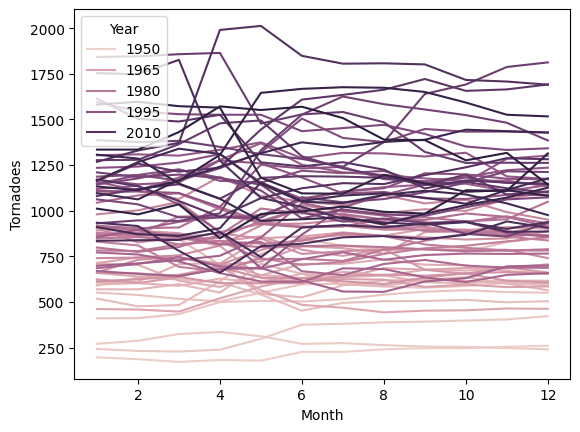

In [50]:
sns.lineplot(data = df, x = 'Month', y = 'Tornadoes', hue = 'Year')

### Look for correlations

<Axes: >

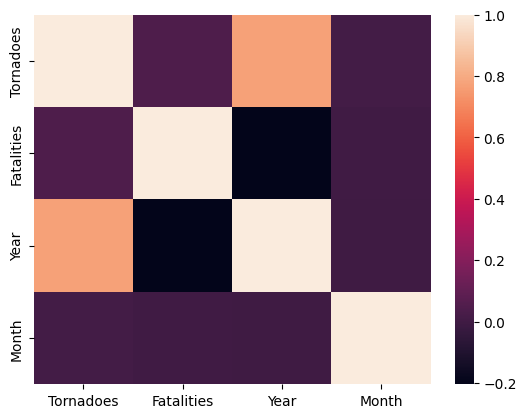

In [56]:
correlation_table = df.corr()
correlation_table
sns.heatmap(correlation_table)

### Create Linear Regression 

In [72]:
# Split data
X = df.drop(columns = ['Tornadoes'])
y = df['Tornadoes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


# create model https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d
model = LinearRegression
model.fit(X_train,y_train)


TypeError: LinearRegression.fit() missing 1 required positional argument: 'y'